
# Dancing untill the last Fandango

## . With this Project we are going to try to unveil if Fandango's officials sticked to their promise of reviewing and correcting the supposed biased rating attribution bug.
## . We are going to analyze recent movie ratings data, and try to conclude, base on previous fidings from Walt Hickey's article on Fandango's rating system, if the same biased system prevails, or if it was corrected. 

In [1]:
# Importing all the necessary libraries for the development of our analysis:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reading into Walt Hickey (WH) Dataset:
WH = pd.read_csv('fandango_score_comparison.csv')
WH[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
# Reading into Dataquest's (DQ) member most recent Dataset:
DQ = pd.read_csv('movie_ratings_16_17.csv')
DQ[:5]

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


### Adapting both Dataset's, WH and DQ, to our subject of analysis - Fandango's rating system.
### We will do so by opting for some columns in detriment of others. Choosing only to include the columns that better suit our purpose and our goals with this analysis.

In [4]:
# Columns of interest for our WH DataFrame:
cols_wh = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
        'Fandango_votes', 'Fandango_Difference']

# Building our new WH Dataframe, which will only include Fandango related cols:
fandango_wh = WH[cols_wh]

fandango_wh[:5]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
# Columns of interest for our DQ DataFrame:
cols_dq = ['movie', 'year', 'fandango']

# Building our new DQ Dataframe, which will only include Fandango related cols:
fandango_dq = DQ[cols_dq]

fandango_dq[:5]

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [6]:
# Now we are going to extract from both Datasets two samples, that best represent
# their respective population - different movies. With best represent, we mean 
# to say that bears the less sampling error value.

# Since both our populations - fandango_wh and fandango_dq - present themselves
# as two relatively small Datasets, containg 146 and 214 rows, respectively, 
# opting for a Simple Random Sampling (SRS) does pose as a rather challenging and
# dangerous method. For a sample based in SRS to be representative of our 
# population, our population needs to be a large one, because our sample will 
# have to be itself a large sample. Thus, having a small population and trying to
# sample it in a large sample, doesn't make any sense. The Sample and the 
# Population would overlap each other. 

In [7]:
# TEST COM Simple Random Sampling (SRS):
for i in range(100):
    fandango_wh_sample = fandango_wh.sample(100, random_state=i)

# Checking the Sampling Error:
sampling_error = fandango_wh['Fandango_Ratingvalue'].mean() - \
                 fandango_wh_sample['Fandango_Ratingvalue'].mean()
print(sampling_error)
print('Fandango_wh Shape:\t', fandango_wh.shape)

print('Fandango_dq Shape:\t', fandango_dq.shape)

0.024205479452054757
Fandango_wh Shape:	 (146, 5)
Fandango_dq Shape:	 (214, 3)


In [8]:
# Proportional Stratified Sampling:
print(fandango_dq['fandango'].value_counts(bins=6, normalize=True)*100
     )

(3.75, 4.167]                  38.317757
(4.167, 4.583]                 26.635514
(3.333, 3.75]                  23.364486
(2.917, 3.333]                  8.411215
(2.4970000000000003, 2.917]     2.803738
(4.583, 5.0]                    0.467290
Name: fandango, dtype: float64


In [9]:
# Building our own interval ranges:
fandango_dq_intervals = pd.interval_range(start=2, end=5, freq=0.5)
print(fandango_dq_intervals)

IntervalIndex([(2.0, 2.5], (2.5, 3.0], (3.0, 3.5], (3.5, 4.0], (4.0, 4.5], (4.5, 5.0]]
              closed='right',
              dtype='interval[float64]')


In [10]:
freq_tab_fandango_dq = pd.Series([0,0,0,0,0,0], index=fandango_dq_intervals)

for i in fandango_dq['fandango']:
    for interval in fandango_dq_intervals:
        if i in interval:
            freq_tab_fandango_dq.loc[interval] += 1
            
freq_tab_fandango_dq.head()

(2.0, 2.5]     6
(2.5, 3.0]    18
(3.0, 3.5]    50
(3.5, 4.0]    82
(4.0, 4.5]    57
dtype: int64

In [11]:
from scipy.stats import percentileofscore

# Tentar replicar a tabela de distribuição acima, e escolher 5 bins, a ver s me
# dão os mm intervalos: 
freq_fandango_dq = fandango_dq['fandango'].value_counts(bins=5,
                                                       normalize=True).sort_index()*100
freq_fandango_dq.head()

(2.4970000000000003, 3.0]    11.214953
(3.0, 3.5]                   23.364486
(3.5, 4.0]                   38.317757
(4.0, 4.5]                   26.635514
(4.5, 5.0]                    0.467290
Name: fandango, dtype: float64

In [12]:
# Qdo ca. de 65% das observações estão distribuidas por 2 intervalos, 3.5--4.0 e
# 4.0--4.5 n poderemos afirmar e dizer que temos uma amostra que seja representa
# tiva de todo o espectro das Nossas Obervervações.

# Vamos testar esta teoria para o outro Dataframe, o fandango_wh:

In [13]:
freq_fandango_wh = fandango_wh['Fandango_Ratingvalue'].value_counts(bins=5,
                                normalize=True).sort_index()*100
freq_fandango_wh.head()

(2.697, 3.12]    10.958904
(3.12, 3.54]     18.493151
(3.54, 3.96]     23.287671
(3.96, 4.38]     31.506849
(4.38, 4.8]      15.753425
Name: Fandango_Ratingvalue, dtype: float64

In [14]:
# Uma situação mt similar, como podemos verificar, aproximadamente 55% de todas
# as observações estão contidas num array de 2 intervalos, 3.54--3.96 e 3.96--4.38


In [15]:
# O Q TEMOS Q FZR A SEGUIR, É COLOCAR UMA VISUALIÇÃO DESTAS FREQ P AMBOS OS DF's
# OU PLOTAMOS UM HISTOGRAMA OU UMA KDP (KERNEL DENSITY PLOT)
# FZR TB O EX D PLOTAR UM SCATTER C A MÉDIA P CADA DATAFRAME, E TDS OS RATINGS P
# CADA FILME, ISTO P VER S A AMOSTRA É REPRESENTATIVA OU N, OU S, PELO CONTRÁRIO
# OS VALORES ANDAM MT DISPERSOS E AFASTADOS DA MÉDIA

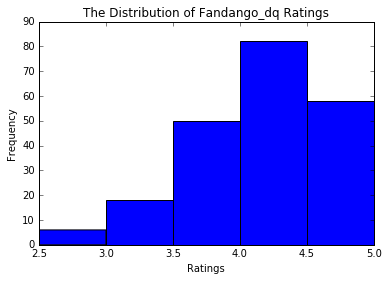

In [16]:
# Plotar um histograma para freq_fandango_dq:
fandango_dq['fandango'].plot.hist(range=(2.5, 5), 
                                  bins=5, 
                                  title='The Distribution of Fandango_dq Ratings')
plt.xlabel('Ratings')

plt.show()

In [17]:
# O q podemos constatar acima foi exactamente as mesmas ilaçõe que tiramos da 
# distribuição de frequências, a amostra de Fandango_dq está negativamente ou
# skewed à esquerda.

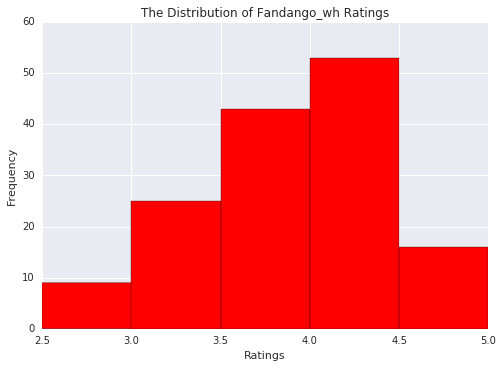

In [18]:
import seaborn as sns

fandango_wh['Fandango_Ratingvalue'].plot.hist(range=(2.5, 5),
                                             bins=5,
                                             color='red',
                                             title='The Distribution of Fandango_wh Ratings')
plt.xlabel('Ratings')

sns.despine()

plt.show()

In [19]:
# Esta distribuição é também, ainda que ligeiramente, enviesada à esquerda. Com 
# a maior parte dos valores. Poderemos portanto concluir que a amostra não deverá
# ser representativa da população a analisar. 

In [20]:
# Checking how many unique ratings there are in both our Dataframes:
fandango_dq_unik = fandango_dq['fandango'].max()
fandango_wh_unik = fandango_wh['Fandango_Ratingvalue'].max()

print(fandango_dq_unik)
print(fandango_wh_unik)

5.0
4.8


In [21]:
# Um dos motivos para este enviesamento verificado em ambas as N/amostras poderá
# ter a ver com os critérios escolhidos pelos 2 investigadores para recolher os 
# dados e criar as amostragens.

# Ambos os investigadores seguiram a mesma abordagem. Se por um lado o investigador
# da DataQuest criou a amostra com base nos filmes mais populares para aquele
# periodo de 2016 a 2017 - não especificando qual o critério utilizado para 
# definir mais popular - o mesmo ocorreu no caso do Walt Hickey, em que um dos
# critérios que ele utilizou para criar a amostra foi que os filmes tivessem pelo
# menos 30 reviews de fãs. Este critério poderá também ser entendido como uma boa
# proxy para popularidade. 

# Ambos os 2 critérios podem levar com que a amostra seja composta maioritariamente
# por filmes com ratings altos. Filmes mais populares normalmente têm tendência
# a ter classificações mais altas que os demais. Isto poderá ser uma das 
# explicações para as as distribuições de frequência verificadas em ambas as 
# amostras. 

# Este tipo de amostragem designa-se por PURPOSIVE SAMPLING! Também conhecida por
# Amostragem Selectiva ou Subjectiva 

In [22]:
# O que fazer agora que verificamos que as N/amostras se encontram 'sujas'?
# A atitude mais hercúleana a fazer seria tentarmos sacar td a Data novamente. A
# menos existente de todo, e mais simples, seria desistir do projecto, e temos 
# ainda uma outra opção: mudar o objecto do N/estudo. Neste etapa, esta última
# opção parece-nos a mais sensata e menos violenta a operar. Vamos tentar então
# por isso alterar o objectivo inicial da N/análise para um outro mais fazível
# de acordo com os dados de que dispomos. 

# A população de interesse em vez de serem todos os filmes com Rating na plataforma
# Fandango, será apenas todos os filmes Populares na plataforma Fandago. E iremos
# optar por trabalhar, e comparar os dados/filmes de 2015 com os de 2016. 

In [23]:
# Primeiro, é importante limarmos a palavra popular, e tentarmos perceber o que é 
# isso de ser popular. Tratar de definir popular!

# Uma boa proxy para tal é pegarmos no que já foi feito por um dos investigadores
# e definir popular como sendo um filme que tem pelo menos 30 ou mais reviews
# dos fãs.

In [24]:
# Vamos então checar/validar se ambas as amostras contêm ou não filmes populares
# mas primeiro temos q segmenter ambos os Datasets em filmes de 2015 e de 2016:
print(fandango_dq['year'].unique())

# Atribuir ao fandango_dq Dataset apenas os filmes do ano 2016:
fandango_dq_2016 = fandango_dq[fandango_dq['year'] == 2016]
print('fandango_dq_2016 Movie release Year:\t',fandango_dq_2016['year'].unique())

[2016 2017]
fandango_dq_2016 Movie release Year:	 [2016]


In [25]:
# Perceber se o fandango_wh Dataset apenas contêm filmes do ano 2015:
print(fandango_wh['FILM'].str.contains('2016').value_counts())
print(fandango_wh['FILM'].str.contains('2017').value_counts())
print(fandango_wh['FILM'].str.contains('2015').value_counts())

False    146
Name: FILM, dtype: int64
False    146
Name: FILM, dtype: int64
True     129
False     17
Name: FILM, dtype: int64


In [26]:
# Hhmmm, existem aqui 17 Datapoints que não apontam para 2015... Vamos tentar 
# perceber que puto de filmes são estes:
fandango_wh_noninana = fandango_wh[fandango_wh['FILM'].str.contains('2015') == False]
fandango_wh_noninana.head(17)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
7,Top Five (2014),4.0,3.5,3223,0.5
12,Leviathan (2014),4.0,3.5,64,0.5
13,Unbroken (2014),4.5,4.1,9443,0.4
14,The Imitation Game (2014),5.0,4.6,8055,0.4
18,Night at the Museum: Secret of the Tomb (2014),4.5,4.1,5445,0.4
25,Selma (2014),5.0,4.6,7025,0.4
28,Wild Tales (2014),4.5,4.1,235,0.4
47,Annie (2014),4.5,4.2,6835,0.3
65,Birdman (2014),4.0,3.7,4194,0.3
69,Mr. Turner (2014),3.5,3.2,290,0.3


In [27]:
# Muito engraçado! O que podemos constatar é que a maior parte dos filme, aliás,
# todos mesmo, que não pertencem a 2015, são Datapoints relacionados com filmes
# do período de 2014. Para sermos o mais clean e precisos possível, teremos que 
# retirar da Nossa população estes filmes de 2014. I e, para termos um comparável
# de 2015 e 2016, não uma especie de 2015 com 2014 comparativamente a 2016.

In [28]:
# Limpando então o fandango_wh Dataset e transformando-o num Dataset referente a
# efectivamente 2015:

fandango_wh_2015 = fandango_wh[
                                fandango_wh['FILM'].str.contains('2015')
                              ]

# Checar o resultado:
print(fandango_wh_2015['FILM'].str.contains('2015').value_counts())

print(fandango_wh_2015['FILM'].str.contains('2015')\
      .value_counts()[1] == fandango_wh_2015.shape[0])

True    129
Name: FILM, dtype: int64
True


In [29]:
# Agora sim, vamos analisar se ambas as Nossas Amostras, quer a fandango_dq_2016,
# quer a fandango_wh_2015 são representativas dos tais filmes ditos populares:
fandango_wh_2015.columns

# A coluna com a qual queremos trabalhar, neste DataSet é a Fandango_votes. Vamos
# então checar se o DataFrame fandango_wh_2015 está povoado de filmes populares -
# com mais de 30 votos dos fans - ou se não:
print(fandango_wh_2015[fandango_wh_2015['Fandango_votes'] >= 30].shape[0])

129


In [30]:
# Depois de validado o Dataset fandango_wh_2015 em termos de amostragem para filmes
# populares, é a vez de fazermos o mesmo processo para a amostra fandango_dq:
fandango_dq_2016.columns
fandango_dq['fandango'].head()

# Parece-me que aqui não temos propriamente uma coluna com os ratings dos fãs.
# Teremos então que arranjar uma forma de contornarmos este problema.

0    3.5
1    4.5
2    3.0
3    4.5
4    3.0
Name: fandango, dtype: float64

In [31]:
# Um dos métodos que poderemos adoptar para contornar esta nuance poderá ser
# retirar uma amosta desta N/amostra, que neste caso é a N/população, e ir 
# directamente ao website da Fandango, e verificar manualmente, e caso a caso,
# se esses filmes dessa amostra retirada da N/população, cumprem ou não o critério
# de filme popular.

# Vamos então primeiro retirar uma amostra de 10 filmes do N/Dataset, e compara-los
# depois com a informaçao que surge no site da Fandango. Para isso vamos utilizar
# o método de amostragem simples, retirando 10 filmes do N/Dataset:
fandango_dq_sample = fandango_dq_2016.sample(10, random_state=1)

# Analisar quais foram os filmes recolhidos para a N/amostra:
print(fandango_dq_sample['movie'])

# Depois de analisarmos cada caso individualmente junto do website da Fandango,
# verificamos que que a amostra é bastante representativa daquilo que definimos 
# como sendo popular. Apenas um filme apresentou  menos de 30 reviews, na categoria
# Tomatometer, com 21 reviews, por outro lado apresenta mais de 5.000 ratings 
# que lhe foram atribuidos por pessoas que pagaram um bilhete de cinema para verem
# o titulo em questão. Estamos a falar do Max Steel.

# Podemos então afirmar com toda a segurança que esta amostra é bastante 
# representativa de uma População de filmes populares com data de lançamento 
# de 2016.

36                             Collide
75           Ice Age: Collision Course
125                   Now You See Me 2
171           The Disappointments Room
92            Kubo and the Two Strings
134    Pride and Prejudice and Zombies
40                            Deadpool
115                      Money Monster
204                           War Dogs
111               Miracles from Heaven
Name: movie, dtype: object


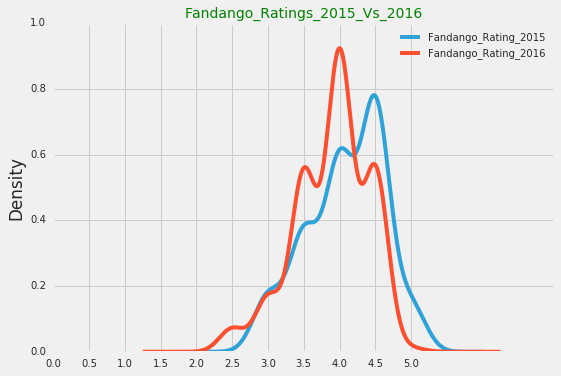

In [32]:
# Escolher o estilo que queremos dar ao N/KDE:
plt.style.use('fivethirtyeight')

# Gerar um gráfico Kernel p ambas as amostras, e sobrepor esses mesmos 2 gráficos
# na mesma imagem:
fandango_wh_2015['Fandango_Stars'].plot.kde(label='Fandango_Rating_2015', 
                                            legend=True 
                                            )
fandango_dq_2016['fandango'].plot.kde(label='Fandango_Rating_2016', legend=True)

# Colocar um titulo na imagem de ambos os gráficos, e parametrizá-lo:
plt.title('Fandango_Ratings_2015_Vs_2016', 
          fontsize=14,
          color= 'green')

# Escolher os ticks para o eixo dos x de acordo com os dados que estamos a analizar:
plt.xticks(np.arange(0,5.5, 0.5))

#sns.distplot(kde_kws = {'shade':True})

# Mostrar o gráfico
plt.show()

In [33]:
# É possivel verificar 2 tendências, primeiro ambos os gráficos são negativamente
# incliniddos, i e, têm uma inclinação à esquerda. Isto significa que as N/amostras
# são maioritariamente povoadas por ratings altos. A outra tendência que é possivel
# verificar é que existe uma clara distinção entre ambas as amostras, quer a de 
# 2015 quer a de 2016. Se em 2015 os ratings estavam bem mais distribuidos pelos
# patamares de 4.5/+, em 2016 nota-se um claro recuo na distribuição, um recuo de
# aproximadamente 0.5. 'Caindo' a amostra mais para a direita.

# Nota-se claramente um eforço da Fandango, em 2016, para suavizar e fazer um 
# 'downgrade' dos ratings. Passando grande parte da amostra para a banda dos
# 3.5--4.5. Quando em 2015 essa banda era mais elevada, 4.0--4.5

In [34]:
# De seguida vamos tentar ter uma visão mais granular das distribuições de ambas
# as amostras. Ir um pouco além do muito últil gráfico de estimativa de densidade
# kernel.

# Para tal, vamos criar 2 tabelas, cada tabela para uma das Amostras. E uma vez
# que, as amostras são distintas em número, para facilitarmos a sua comparação
# iremos usar tabelas de distribuição relativas, e expostas em percentagens.

In [35]:
# Tabela de frequências relativas em % para a Amostra fandango_wh_2015:
(fandango_wh_2015['Fandango_Stars'].\
value_counts(normalize=True).sort_index(ascending=False)*100).round(decimals=1)

5.0     7.0
4.5    38.0
4.0    28.7
3.5    17.8
3.0     8.5
Name: Fandango_Stars, dtype: float64

In [36]:
# Tabela de frequências relativas em % para a Amostra fandango_dq_2016:
(fandango_dq_2016['fandango'].\
value_counts(normalize=True).sort_index(ascending=False)*100).round(decimals=1)

5.0     0.5
4.5    24.6
4.0    40.3
3.5    24.1
3.0     7.3
2.5     3.1
Name: fandango, dtype: float64

In [37]:
# A tendência aqui, e o corte verificado de um ano para o outro, são ainda mais
# claros utilizando ambas estas tabelas de frequências relativas.

# Como podemos constatar, na amostra de 2015 os ratings de 4.5--5.0 estavam 
# povoados com cerca de 45% de todas as amostras. Ao invés, na amostra de 2016,
# esse valor cai para cerca de 25%. Sendo que o maior intervalo, em 2016 passa a
# ser o range de 3.5--4.0, com cerca de 64% de todas as amostras.

In [38]:
# De seguida vamos proceder ao cálculo de alguns dados estatísticos para ambas as
# Amostras. De entre os quais, a média, mediana, e moda. Além disso, iremos
# apresentar esses valores num gráfico de barras agrupado, para que possamos
# melhor vizualizar as diversas direções/diferenças dos dados estatísticos de 
# ambas as Amostras.

In [39]:
# Calcular a média para ambas as Amostras:
fandango_wh_2015_ratings_média = fandango_wh_2015['Fandango_Stars'].mean()
fandango_dq_2016_ratings_média = fandango_dq_2016['fandango'].mean()

# Calcular a mediana para ambas as Amostras:
fandango_wh_2015_ratings_mediana = fandango_wh_2015['Fandango_Stars'].median()
fandango_dq_2016_ratings_mediana = fandango_dq_2016['fandango'].median()

# Calcular a moda para ambas as Amostras:
fandango_wh_2015_ratings_moda = fandango_wh_2015['Fandango_Stars'].mode()[0]
fandango_dq_2016_ratings_moda = fandango_dq_2016['fandango'].mode()[0]

# Criar um DataFrame a paritr das variáveis calculadas anteriormente
data = {'2015':[fandango_wh_2015_ratings_média,
               fandango_wh_2015_ratings_mediana,
               fandango_wh_2015_ratings_moda],
        '2016':[fandango_dq_2016_ratings_média,
               fandango_dq_2016_ratings_mediana,
               fandango_dq_2016_ratings_moda]}

média_mediana_moda = pd.DataFrame(data=data,
                                 index=['Média',
                                        'Mediana',
                                       'Moda'])
média_mediana_moda.head()

,2015,2016
Média,4.085271,3.887435
Mediana,4.000000,4.000000
Moda,4.500000,4.000000


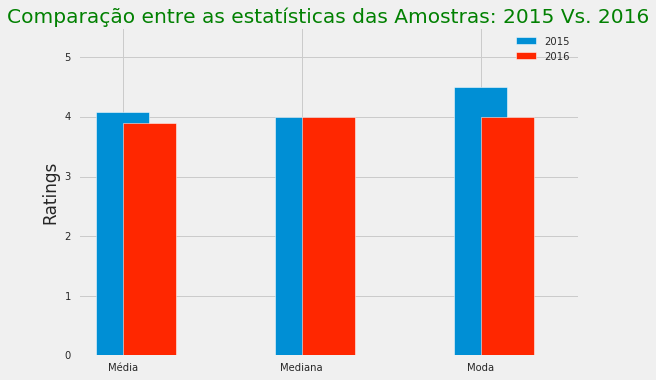

In [40]:
# Iremos agora construir os gráficos relacionados com o Dataframe anterior:
plt.style.use('fivethirtyeight')

média_mediana_moda['2015'].plot.bar(color='#008FD5',
                                    align='center', 
                                    edgecolor='white',
                                    width=.30,
                                    label='2015')
média_mediana_moda['2016'].plot.bar(color='#FF2700',
                                    align='edge',
                                    edgecolor='white',
                                    width=.30,
                                    label='2016')

plt.ylim(0,5.5)
plt.xticks(rotation=0)
plt.ylabel('Ratings')
plt.title('Comparação entre as estatísticas das Amostras: 2015 Vs. 2016',
         color='green')
plt.legend(framealpha=.5, loc='upper right')
plt.show()

In [41]:
# Engraçado de ver que apesar de realmente a média dos Ratings atribuidos baixar
# do periodo de 2015 para 2016, a mediana porém mantém-se exactamente igual.
# Quanto à moda, podemos perceber que os valores que surgiram em maior número
# são mais elevados na Amostra de 2015 do que na de 2016. Fixando-se os valores
# de 2015 em torno de 4.5, enquanto que os de 2016 na ordem dos 4.0. 

# Estas observações corroboram o que já haviamos verificado nas análises anteriores,
# quer no gráfico de estimativa d densidade kernel, quer na tabela de frequências
# relativas.

# Um dos motivos para estas discrepâncias ocorridas de um período para o outro, 
# poderá ser atribuido a um recuo neste tipo de arredondamento por excesso, por
# por parte da Fandango, fruto de algum tipo de alarido que poderá ter ocorrido
# no seio dos cinéfilos, ou em grupos/foruns online da especialidade. A Fandago
# terá cedido à pressão, e tentado corrigir a ousadia.